# Previsão de "churn" para clientes, utilizando o classificador Random Forest
### O script a seguir é utilizado para demonstrar as habilidades técnicas quanto à utilização de machine learning para um problema de classificação, gozando de métodos para AEP, ML, Dataviz, Feature Engineering e Tunning com Grid Search

#### Estou aberto à críticas, dicas etc!

In [1]:
# importando bibliotecas para importar os dados
import pandas as pd

### --------------------------------------------------------------------------------------------------------------------------------------------------------
### Análise Exploratória dos Dados
### --------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
# importando a base de dados "Telca Customer Churn"
df = pd.read_csv(r'C:\Users\pedro\Desktop\Geral\Portfolio_Dados\kaggle\telco_customer_churn.csv',
                sep = ',')

In [3]:
# explorando nosso dataset utilizando métodos do pandas
df.size # total de registros do dataset
df.shape # número de linhas e colunas, respectivamente
df.info() # informações sobre colunas e seus tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
# retornando os dados
# df.head(10) # retorna os 10 primeiros registros
# df.tail(10) # retorna os 10 últimos registros

# verificando os nulos
# df.isna().sum() # não temos nulos

# convertendo a coluna "TotalCharges" para float64
# df['TotalCharges'] = df['TotalCharges'].astype('float64') # retornou erro... a coluna em questão, possui, invés de NaN, um valor em branco

# substituindo os valores em branco por NaN, usando numpy
import numpy as np # importando o numpy
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# testando uma nova conversão, após feita a substituição dos valores em branco
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# verificando o novo tipo da coluna 'TotalCharges'
df['TotalCharges'].dtypes # agora a coluna é do tipo float64

# verificando a coluna 'SeniorCitizen'
df['SeniorCitizen'].unique() # a coluna em questão contém valores booleanos, porém, está categorizada como numérica

# convertendo a coluna 'SeniorCitizen' para 'bool'
df['SeniorCitizen'] = df['SeniorCitizen'].astype('bool')

In [58]:
# explorando as colunas e valores do nosso dataset
# separando colunas por tipos (desconsiderando o customerID), a fim de facilitar a análise

# Variáveis Numéricas
colunas_numericas = []
print('-----------------------------\nNuméricas:\n-----------------------------')
for i in df.columns.tolist():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        print(i, ':', df.dtypes[i])
        colunas_numericas.append(i)
        
# Variáveis Categóricas
colunas_categoricas = []
print('\n-----------------------------\nCategóricas:\n-----------------------------')
for i in df.columns.tolist():
    if df.dtypes[i] == 'object':
        print(i, ':', df.dtypes[i])
        colunas_categoricas.append(i)

-----------------------------
Numéricas:
-----------------------------
tenure : int64
MonthlyCharges : float64
TotalCharges : float64

-----------------------------
Categóricas:
-----------------------------
customerID : object
gender : object
Partner : object
Dependents : object
PhoneService : object
MultipleLines : object
InternetService : object
OnlineSecurity : object
OnlineBackup : object
DeviceProtection : object
TechSupport : object
StreamingTV : object
StreamingMovies : object
Contract : object
PaperlessBilling : object
PaymentMethod : object
Churn : object


### --------------------------------------------------------------------------------------------------------------------------------------------------------
### Explorando os dados através de visualizações
### --------------------------------------------------------------------------------------------------------------------------------------------------------

In [59]:
# importando as bibliotecas Matplotlib e Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'Total Charges')]

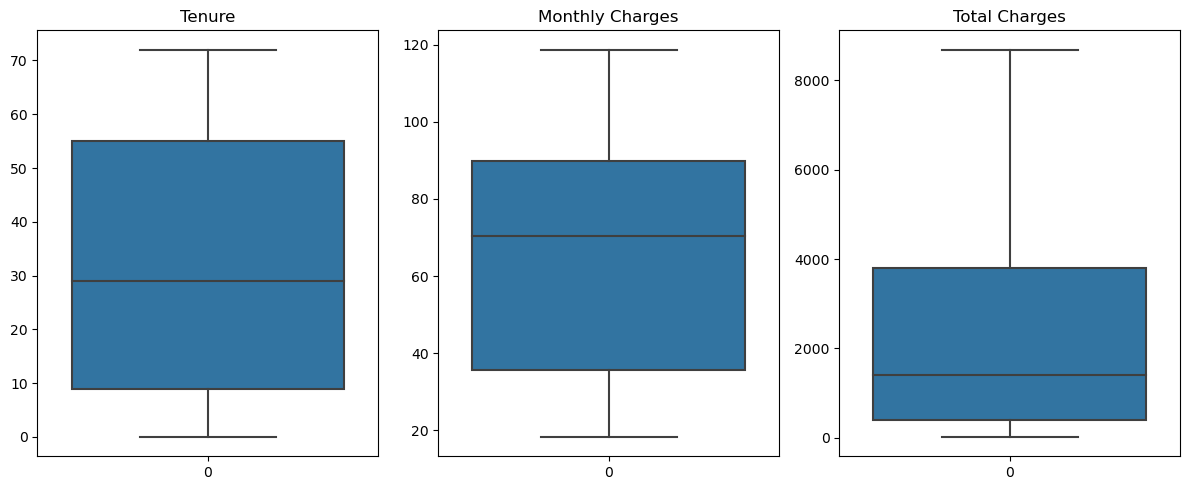

In [60]:
# definindo o tamanho das exibições gráficas
plt.rcParams['figure.figsize'] = [12.00, 5.00]
plt.rcParams['figure.autolayout'] = True

# layout para as variáveis numéricas
f, axes = plt.subplots(1, 3) # 1 linha e 3 colunas

linha = 0
coluna = 0

'''
exibindo a distribuição dos dados numéricos em forma de boxplot, a fim de conhecermos a distribuição matemática e 
identificar possíveis outliers
'''
# Coluna 'tenure'
sns.boxplot(data = df['tenure'], ax = axes[0]).set(title = 'Tenure')

# Coluna 'MonthlyCharges'
sns.boxplot(data = df['MonthlyCharges'], ax = axes[1]).set(title = 'Monthly Charges')

# Coluna 'MonthlyCharges'
sns.boxplot(data = df['TotalCharges'], ax = axes[2]).set(title = 'Total Charges')

[Text(0.5, 1.0, 'Count by Multiple Lines'),
 Text(0.5, 0, 'Multiple Lines'),
 Text(0, 0.5, 'Count')]

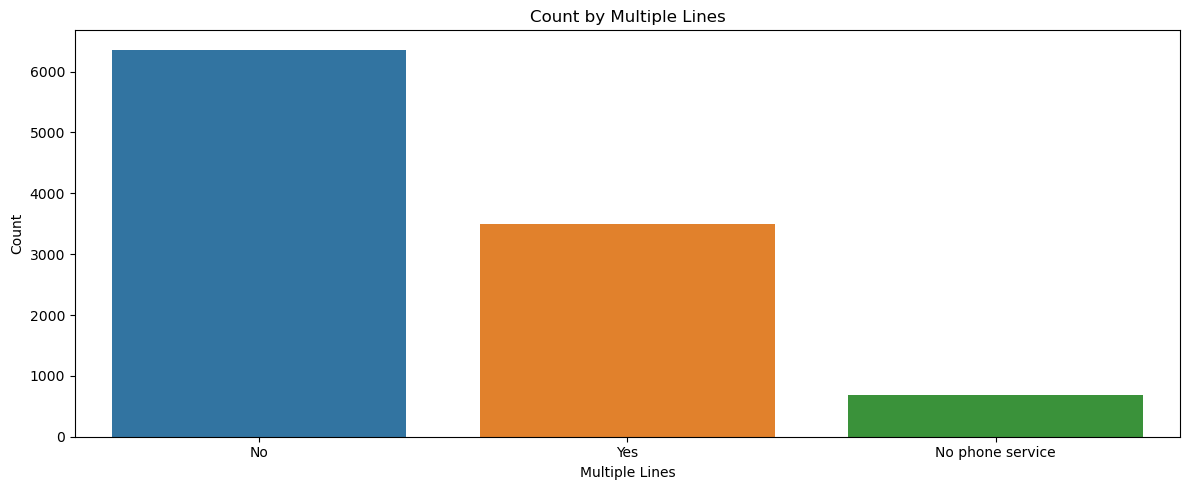

In [61]:
# definindo o tamanho das exibições gráficas
plt.rcParams['figure.figsize'] = [12.00, 5.00]
plt.rcParams['figure.autolayout'] = True

# layout para as variáveis categóricas
f, axes = plt.subplots(1, 1) # 1 linha e 1 coluna

# Plotando gráficos em barras
# Gender
sns.barplot(x = df.gender.value_counts().index,
            y = df.gender.value_counts()).set(title = 'Count by Gender', xlabel = 'Gender', ylabel = 'Count')

# Partner
sns.barplot(x = df.Partner.value_counts().index,
            y = df.Partner.value_counts()).set(title = 'Count by Partner', xlabel = 'Partner', ylabel = 'Count')

# Dependents
sns.barplot(x = df.Dependents.value_counts().index,
            y = df.Dependents.value_counts()).set(title = 'Count by Dependents', xlabel = 'Dependents', ylabel = 'Count')

# Phone Service
sns.barplot(x = df.PhoneService.value_counts().index,
            y = df.PhoneService.value_counts()).set(title = 'Count by Phone Service', xlabel = 'Phone Service', ylabel = 'Count')

# Multiple Lines
sns.barplot(x = df.MultipleLines.value_counts().index,
            y = df.MultipleLines.value_counts()).set(title = 'Count by Multiple Lines', xlabel = 'Multiple Lines', ylabel = 'Count')

### --------------------------------------------------------------------------------------------------------------------------------------------------------
### Preparação dos dados para o treinamento do Modelo
### --------------------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
# utilizando a função "get_dummies" do Pandas, para converter nossos dados categóricos em numéricos
df_dummies = pd.get_dummies(df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']])

# utilizando a função LabelEncoder na nossa variável target 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['Churn']) # treinando o Label Encoder com a nossa variável target
target = le.transform(df['Churn']) # convertendo os dados da variável target para um formato numérico

# importando as bibliotecas do scikit learn
from sklearn.model_selection import train_test_split # separa o dataset em treino e teste
from sklearn.preprocessing import MinMaxScaler

# separando nossos dados entre treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(df_dummies, target, test_size = 0.3, random_state = 40)

# normalizando os dados, utilizando MinMaxScaler
sc = MinMaxScaler()
sc.fit(X_treino)
X_treino_norm = sc.transform(X_treino)
X_teste_norm = sc.transform(X_teste)

### --------------------------------------------------------------------------------------------------------------------------------------------------------
### Treinando o nosso modelo de classificação (Random Forest)
### --------------------------------------------------------------------------------------------------------------------------------------------------------

#### Algoritmo Random Forest (tunning com GridSearch)

In [32]:
# importando o modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# bibliotecas de suporte
import numpy as np
import time

# declarando o modelo
random_forest = RandomForestClassifier()

# verificando os parâmetros do Random Forest
random_forest.get_params()

# definindo valores para o GridSearch
n_estimators = np.array([100, 120, 160, 200])
max_depth = np.array([10, 15])
criterion = np.array(['gini', 'entropy'])
max_features = np.array(['sqrt', 'log2', None])
min_sample_split = np.array([2, 4, 5])
min_samples_leaf = np.array([2, 3, 4])
bootstrap = np.array(['True', 'False'])

# definindo os parâmetros do GridSearch
grid_params = dict(n_estimators = n_estimators,
                  max_depth = max_depth,
                  criterion = criterion,
                  max_features = max_features,
                  min_samples_split = min_sample_split,
                  min_samples_leaf = min_samples_leaf,
                  bootstrap = bootstrap)

# definindo nosso modelo
random_forest = GridSearchCV(random_forest, grid_params, cv = 4, n_jobs = 8)

# treinando o modelo
hora_inicio = time.time()
random_forest.fit(X_treino_norm, y_treino)
hora_fim = time.time()

#### Verificando os desempenhos dos treinos do Random Forest

In [54]:
# verificando os parâmetros treinados
treinos_random_forest = pd.DataFrame(random_forest.cv_results_)

# retornando os outputs dos treinamentos
print('Resultados\n-----------------------------------------------------------------------------------')
print('Melhor acurácia obtida: \n{:.2%}'.format(random_forest.best_score_))
print('\nMelhores hiperparâmetros: \n{}'.format(random_forest.best_params_))
print('\nDuração do treinamento: ', round(hora_fim - hora_inicio, 2), 'segundos ou', round((hora_fim - hora_inicio) / 60, 2), 'minutos')
print('\nTreinos realizados: ', treinos_random_forest.shape[0])

Resultados
-----------------------------------------------------------------------------------
Melhor acurácia obtida: 
79.21%

Melhores hiperparâmetros: 
{'bootstrap': 'False', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}

Duração do treinamento:  387.82 segundos ou 6.46 minutos

Treinos realizados:  864
